# Setup

you can use pygeos or rtree but you need to install before geopandas

In [198]:
try:
  import pygeos
except ModuleNotFoundError as e:
  !pip install pygeos==0.10.2
  import pygeos

In [199]:
try:
    import geopy
except ModuleNotFoundError as e:
    !pip install geopy==2.2.0
    import geopy
if geopy.__version__ != "2.2.0":
    !pip install -U geopy==2.2.0
    import geopy

In [200]:
try:
  import mapclassify
except ModuleNotFoundError as e:
  !pip install mapclassify=="2.4.3"
  import mapclassify

In [201]:
try:
  import geopandas as gpd
except ModuleNotFoundError as e:
  !pip install geopandas==0.10.2
  import geopandas as gpd
if gpd.__version__ != "0.10.2":
  !pip install -U geopandas==0.10.2
  import geopandas as gpd

Defaulting to user installation because normal site-packages is not writeable


In [202]:
try:
    import owslib
except ModuleNotFoundError as e:
    !pip install owslib==0.25.0
    import owslib
    
if owslib.__version__ != "0.25.0":
    !pip install -U owslib==0.25.0
    import owslib


In [203]:
try:
    import shapefile
except ModuleNotFoundError as e:
    !pip install pyshp==2.1.3
    import shapefile

if shapefile.__version__ != "2.1.3":
    !pip install -U pyshp==2.1.3
    import shapefile

In [204]:
import os
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'

try:
    import restapi
except ModuleNotFoundError as e:
    !pip install bmi-arcgis-restapi==2.1.2
    import restapi

if restapi.__version__ != "2.1.2":
    !pip install -U bmi-arcgis-restapi==2.1.2
    import restapi


# Exercises
- identify the location of these address with a geocoder
   - Piazza Castello, Udine
   - Piazza Italia, Trento
   - Piazza Foroni, Torino
- find the administrative border of "comunità di valle" (community of valley) of Province Autonomous of Trento
- identify all the rivers inside the smallest community of valley of Trentino
- repeat the same exercise with the layer "Comuni Terremotati" (municipalities affected by earthquake) of the italian Civil Protection by choosing the smallest municipality contained on the layer

---

# Solutions

## learning objectives
* repeat the concepts on the previous lesson

---

## identify the location of these address with a geocoder
- Piazza Castello, Udine
- Piazza Italia, Trento
- Piazza Foroni, Torino

#### Piazza Castello, Udine

In [260]:
q="Piazza, Castello, Udine"
point = gpd.tools.geocode(q, provider="arcgis") 
point.address[0]

'Piazza Castello, 33010, Colloredo di Monte Albano, Udine'

Colloredo di Monte Albano is a municipality of Friuli Venezia Giula in province of 

We need to improve the query search because "Udine" is a municipality and also a (former) province.

In [261]:
q="Piazza, Castello, Udine, Udine"
point = gpd.tools.geocode(q, provider="arcgis") 
point.address[0]

'Piazzale del Castello, 33100, Udine'

In [262]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

this sounds right ... but "Piazzale"

In [265]:
point_nominatim = gpd.tools.geocode(q,provider="Nominatim",user_agent="Example for the course")
point_nominatim.address[0]

'Piazza Longobardi, Castello, Majano, Udine, Friuli-Venezia Giulia, Italia'

Complety wrong!
```q="Piazza, Castello, Udine, Udine"```
There a comma to remove

In [267]:
q="Piazza Castello, Udine, Udine"
point_nominatim = gpd.tools.geocode(q,provider="Nominatim",user_agent="Example for the course")
point_nominatim.address[0]


'Piazza Castello, Laibacco, Colloredo di Monte Albano, Udine, Friuli-Venezia Giulia, Italia'

again wrong ... 
investigate more values

In [275]:
q="Piazzale Castello, Udine, Udine"
point_nominatim = gpd.tools.geocode(q,provider="Nominatim",user_agent="Example for the course")
point_nominatim.address[0]

'Piazzale della Patria del Friuli, Borgo Gemona, Udine, Friuli-Venezia Giulia, 33100, Italia'

In [277]:
point_nominatim.explore(marker_kwds={"color": "green", "radius": "10"})

this looks right

More investigation

In [278]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Example for the course")

In [279]:
more_values = geolocator.geocode(q,exactly_one=False)

In [280]:
more_values

[Location(Piazzale della Patria del Friuli, Borgo Gemona, Udine, Friuli-Venezia Giulia, 33100, Italia, (46.0647686, 13.235658516341397, 0.0))]

In [281]:
more_values[0].raw

{'place_id': 164989388,
 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright',
 'osm_type': 'way',
 'osm_id': 243637944,
 'boundingbox': ['46.0644445', '46.0651157', '13.2352794', '13.2360969'],
 'lat': '46.0647686',
 'lon': '13.235658516341397',
 'display_name': 'Piazzale della Patria del Friuli, Borgo Gemona, Udine, Friuli-Venezia Giulia, 33100, Italia',
 'class': 'landuse',
 'type': 'grass',
 'importance': 0.52}

Ok! This isn't a square (piazza), this is an area around the castle of Udine

#### Piazza Italia, Trento

In [282]:
q="Piazza Italia, Trento"
point = gpd.tools.geocode(q, provider="arcgis") 
point.address[0]

'Piazza, Terragnolo, Trento'

this sounds like "The main square (piazza) of the muncipality of Terragnolo in province of Trento"<Br/>
... we can try to specify better the city and the province

In [312]:
q="Piazza Italia, Trento, Provincia di Trento"
point = gpd.tools.geocode(q, provider="arcgis") 
point.address[0]

'Trento, Provincia di Trento'

In [314]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

bad position: the point is good to represent Trento but not the square

change geocoder

In [319]:
point = gpd.tools.geocode(q, provider="nominatim",user_agent="Example for the course")
point.address[0]

'Piazza Italia, Villa Rendena, Porte di Rendena, Comunità delle Giudicarie, Provincia di Trento, Trentino-Alto Adige/Südtirol, 38979, Italia'

again wrong ... add more details? 

In [322]:
q="Piazza Italia, Centro Storico Trento, Trento, Provincia di Trento"
point = gpd.tools.geocode(q, provider="nominatim",user_agent="Example for the course")
point.address[0]

"Piazza Cesare Battisti, Bolghera, Centro storico Trento, Trento, Territorio Val d'Adige, Provincia di Trento, Trentino-Alto Adige/Südtirol, Italia"

In [328]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

this sounds right but ... this is Piazza Cesare Battisti 


Note:<br/>
Piazza Italia is the former name of Piazza Cesare Battisti

#### Piazza Foroni, Torino

In [329]:
q="Piazza, Foroni, Torino, Torino"
point = gpd.tools.geocode(q, provider="arcgis") 
point.address[0]

'Via Jacopo Foroni, 10154, Torino'

"Via" means "Street". Mistake or this is close to a square with the same name? 

In [330]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

In [331]:
q="Piazza, Foroni, Torino, Torino"
point = gpd.tools.geocode(q, provider="nominatim",user_agent="Example for the course")
point.address[0]

'Mercato di Piazza Foroni, Piazza Jacopo Foroni, Monte Rosa, Circoscrizione 6, Torino, Piemonte, 10154, Italia'

In [332]:
point.explore(marker_kwds={"color": "green", "radius": "10"})

## find the administrative border of “comunità di valle” (community of valley) of Province Autonomous of Trento

In [208]:
from owslib.csw import CatalogueServiceWeb
from owslib.fes import PropertyIsLike
import geopandas as gpd
from matplotlib import pyplot as plt

We start from the italian national repository - [http://geodati.gov.it](http://geodati.gov.it)

In [209]:
csw = CatalogueServiceWeb("http://geodati.gov.it/RNDT/csw")

In [210]:
query = PropertyIsLike('csw:AnyText', 'Comunità di valle')

In [211]:
csw.getrecords2(constraints=[query],maxrecords=5)

In [212]:
for rec in csw.records:
  print(rec + " - " + csw.records[rec].title)

p_bi:4c07e84b-088e-488f-a144-5dabb3c4b6d0 - Provincia di Biella - vegetazione della Valle Elvo
p_TN:58604ed2-ac1d-4f78-a00c-514fd3562c51 - Limite Comunità di valle
r_emiro:2015-06-04T161431 - Itinerari geologico-ambientali nella Valle del Marecchia
r_abruzz:00047:20091110:151939 - Comunità Montane Regione Abruzzo
r_lombar:000028:20211130:115710 - Carta Ittica Regionale - WMS


In [213]:
id_record="p_TN:58604ed2-ac1d-4f78-a00c-514fd3562c51"

In [214]:
record = csw.records[id_record]

In [215]:
record.abstract

"Rappresenta il limite delle Comunità di valle, le quali sono enti pubblici locali a struttura associativa costituiti obbligatoriamente dai comuni compresi in ciascun territorio individuato ai sensi dell'art.12 comma 2 (LP3-2006 art 14 comma2) ad esse e ai Comuni di Trento e Rovereto sono trasferite numerose competenze che ora sono in capo alla Provincia, ovviamente fatte salve le competenze dei comuni e delle amministrazioni separate dei beni di usi civico.Intesa tra la Provincia e il Consiglio delle Autonomie locali approvato nella seduta del 16 marzo 2007 concernente Individuazione dei territori delle Comunità ai sensi dell'articolo 12 della legge provinciale 16 giugno 2006, n. 3 (Norme in materia di governo dell'autonomia del Trentino).NB: PER LA TABELLA DEGLI ATTRIBUTI E' STATO UTILIZZATO IL SET DI CARATTERI UNICODE UTF-8"

In [216]:
for reference in record.references:
  print(reference['scheme'])
  print(reference['url'])

urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
http://www.territorio.provincia.tn.it
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Server
https://idt.provincia.tn.it/idt/vector/p_TN_58604ed2-ac1d-4f78-a00c-514fd3562c51.zip
urn:x-esri:specification:ServiceType:ArcIMS:Metadata:Document
https://geodati.gov.it/geoportalRNDTPA/csw?getxml=%7B995A9C38-26FD-4564-8539-68744B2A46D2%7D


In [217]:
valley_communities = gpd.read_file('https://siat.provincia.tn.it/IDT/vector/public/p_tn_58604ed2-ac1d-4f78-a00c-514fd3562c51.zip')

In [218]:
valley_communities.head(5)

,objectid,classid,sede,nome,struttura,struttura_,dataini,datafine,fkfonte,fktfonte_d,fktipoelab,fktipoel_d,fkscala,fkscala_d,geometry
0,181,AMB002_14,ANDALO,COMUNITÀ DELLA PAGANELLA,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((659718.849 5118603.995, 659717.453 5..."
1,182,AMB002_8,TIONE DI TRENTO,COMUNITÀ DELLE GIUDICARIE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((626847.878 5074565.314, 626878.525 5..."
2,183,AMB002_12,LAVARONE,MAGNIFICA COMUNITÀ DEGLI ALTIPIANI CIMBRI,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((675134.859 5087715.705, 675136.500 5..."
3,184,AMB002_15,TRENTO,TERRITORIO VAL D'ADIGE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((663458.060 5094288.411, 663453.437 5..."
4,185,AMB002_1,CAVALESE,COMUNITÀ TERRITORIALE DELLA VAL DI FIEMME,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((681770.000 5126270.500, 681789.000 5..."


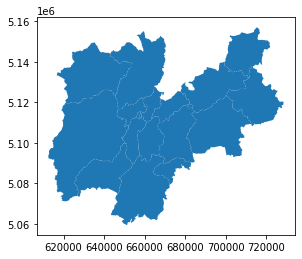

In [219]:
valley_communities.plot()
plt.show()

In [220]:
valley_communities.head(5)

,objectid,classid,sede,nome,struttura,struttura_,dataini,datafine,fkfonte,fktfonte_d,fktipoelab,fktipoel_d,fkscala,fkscala_d,geometry
0,181,AMB002_14,ANDALO,COMUNITÀ DELLA PAGANELLA,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((659718.849 5118603.995, 659717.453 5..."
1,182,AMB002_8,TIONE DI TRENTO,COMUNITÀ DELLE GIUDICARIE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((626847.878 5074565.314, 626878.525 5..."
2,183,AMB002_12,LAVARONE,MAGNIFICA COMUNITÀ DEGLI ALTIPIANI CIMBRI,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((675134.859 5087715.705, 675136.500 5..."
3,184,AMB002_15,TRENTO,TERRITORIO VAL D'ADIGE,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((663458.060 5094288.411, 663453.437 5..."
4,185,AMB002_1,CAVALESE,COMUNITÀ TERRITORIALE DELLA VAL DI FIEMME,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"POLYGON ((681770.000 5126270.500, 681789.000 5..."


## identify all the rivers inside the smallest community of valley of Trentino

### identify the smallest community of valley

In [221]:
smallest_community = valley_communities[valley_communities.area == valley_communities.area.min()]

In [222]:
smallest_community

,objectid,classid,sede,nome,struttura,struttura_,dataini,datafine,fkfonte,fktfonte_d,fktipoelab,fktipoel_d,fkscala,fkscala_d,geometry
10,191,AMB002_13,MEZZOCORONA,COMUNITÀ ROTALIANA-KÖNIGSBERG,S133,Servizio Catasto,2020/01/01 00:00:00.000,None,05,altre fonti,01,manuale,03,10000,"MULTIPOLYGON (((656059.164 5112838.836, 656030..."


In [223]:
smallest_community.nome

10    COMUNITÀ ROTALIANA-KÖNIGSBERG
Name: nome, dtype: object

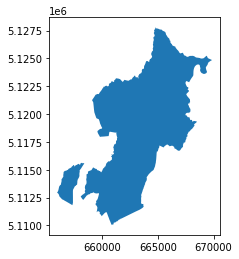

In [224]:
smallest_community.plot()
plt.show()

In [225]:
smallest_community.explore()

### find a layer with the rivers for the area


identify the bounding box

In [226]:
smallest_community.to_crs(epsg=4326).bounds

,minx,miny,maxx,maxy
10,11.019439,46.12501,11.203875,46.283791


In [227]:
bbox = list(smallest_community.to_crs(epsg=4326).bounds.values[0])

In [228]:
bbox

[11.01943938362622, 46.12500990155531, 11.203874962508163, 46.283790799274264]

in this case we can use the WFS of [the national cartographic portal of the Italian Ministry of the Environment](http://www.pcn.minambiente.it/)

In [229]:
csw = CatalogueServiceWeb("http://www.pcn.minambiente.it/geoportal/csw")

![](https://raw.githubusercontent.com/napo/geospatial_course_unitn/master/images/geocatalog_pcn_rivers.png)


[ ... ] 

In [230]:
from owslib.wfs import WebFeatureService

In [231]:
wfs_url="http://wms.pcn.minambiente.it/ogc?map=/ms_ogc/wfs/Aste_fluviali.map"

In [232]:
wfs = WebFeatureService(url=wfs_url,version="1.1.0")

In [233]:
wfs.identification.title

'Reticolo idrografico'

In [234]:
wfs.contents

{'ID.RETICOLO.FIUMI_PRINCIPALI_SECONDARI': <owslib.feature.wfs110.ContentMetadata at 0x7f242015b8b0>,
 'ID.RETICOLO.FIUMI_TORRENTI': <owslib.feature.wfs110.ContentMetadata at 0x7f242015b5b0>,
 'ID.RETICOLO.CORSI_ACQUA': <owslib.feature.wfs110.ContentMetadata at 0x7f242025eef0>,
 'ID.RETICOLO.ELEMENTI_IDRICI': <owslib.feature.wfs110.ContentMetadata at 0x7f242025d690>}

In [235]:
layer = list(wfs.contents)[2]

In [236]:
response = wfs.getfeature(typename=layer, bbox=bbox,srsname='urn:ogc:def:crs:EPSG::4326')

In [237]:
rivers = gpd.read_file(response)

In [238]:
rivers.head(3)

,gml_id,id_fiume,id_tratta,tipo,nome,foglio_igm,sottotipo,ordine,bacino_pri,bacino,da,tipo_da,a,tipo_a,annotazion,enabled,geometry
0,ID.RETICOLO.CORSI_ACQUA.9878,2241,11503,,,BOLZANO,1,3,ADIGE,,SORGENTE,1,NOCE,3,,1,"LINESTRING (46.17313 11.05670, 46.17069 11.060..."
1,ID.RETICOLO.CORSI_ACQUA.16150,688,14645,,,BOLZANO,1,2,ADIGE,,SORGENTE,1,ADIGE,3,,1,"LINESTRING (46.15510 11.03917, 46.15664 11.041..."
2,ID.RETICOLO.CORSI_ACQUA.20273,885,21041,TORRENTE,AVISIO,BOLZANO,1,2,ADIGE,,19357,3,21042,3,,1,"LINESTRING (46.17089 11.23801, 46.17053 11.237..."


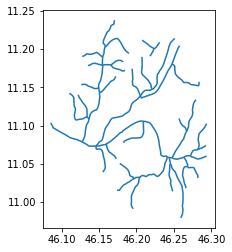

In [239]:
rivers.plot()
plt.show()

In [240]:
geometry_smallest_community_4326 = smallest_community.geometry.to_crs(epsg=4326).values[0]

In [241]:
rivers.within(geometry_smallest_community_4326).unique()

array([False])

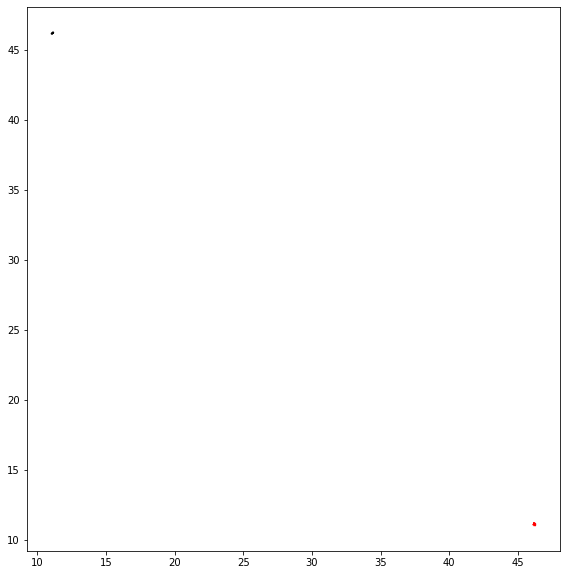

In [242]:
ax = smallest_community.to_crs(4326).plot(edgecolor='k',figsize=(15, 10))
rivers.plot(ax=ax,color="red")
plt.show()


there the problem of the inverted axes<br/>
It can ben solved with this function

In [243]:
import shapely

In [244]:
def swapxy(geometry):
  geometry = shapely.ops.transform(lambda x, y: (y, x),geometry)
  return geometry

In [245]:
rivers['geometry'] = rivers['geometry'].apply(lambda geometry: swapxy(geometry))

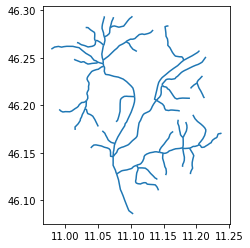

In [246]:
rivers.plot()
plt.show()

we are ready to plot on a map

In [247]:
y = rivers.unary_union.centroid.y
x = rivers.unary_union.centroid.x

In [248]:
y

46.20213279893027

In [249]:
x

11.110945030023714

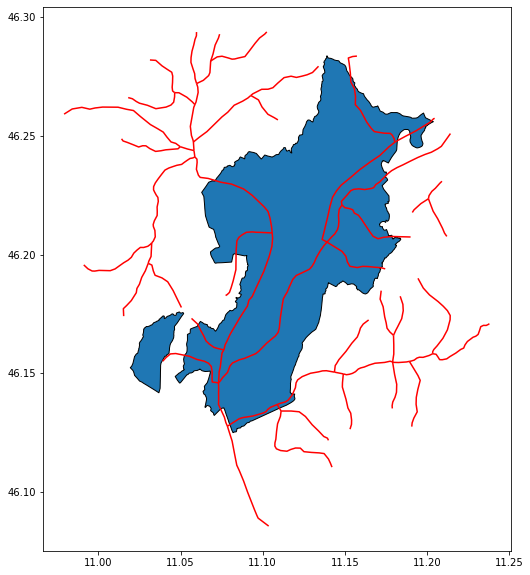

In [250]:
ax = smallest_community.to_crs(4326).plot(edgecolor='k',figsize=(15, 10))
rivers.plot(ax=ax,color="red")
plt.show()

**CLIP**

we need to have all the rivers inside the area and not the bounding box



In [251]:
gpd.clip(rivers, smallest_community)

/tmp/ipykernel_37029/3880772484.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: EPSG:25832

  gpd.clip(rivers, smallest_community)


,gml_id,id_fiume,id_tratta,tipo,nome,foglio_igm,sottotipo,ordine,bacino_pri,bacino,da,tipo_da,a,tipo_a,annotazion,enabled,geometry


the geodatamews have to use the same projection

In [252]:
rivers_rotaliana = gpd.clip(rivers.to_crs(epsg=4326), smallest_community.to_crs(epsg=4326))

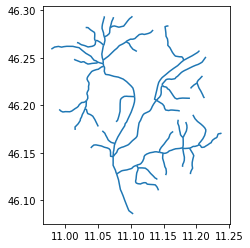

In [253]:
rivers.plot()
plt.show()

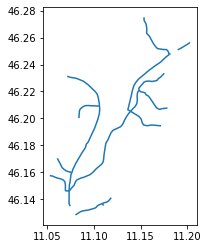

In [254]:
rivers_rotaliana.plot()
plt.show()

show the rivers on the map

In [255]:
rivers.explore()

## repeat the same exercise with the layer “Comuni Terremotati” (municipalities affected by earthquake) of the italian Civil Protection by choosing the smallest municipality contained on the layer

In [256]:
import os
os.environ['RESTAPI_USE_ARCPY'] = 'FALSE'
import restapi

In [257]:
rest_url = 'https://services6.arcgis.com/L1SotImj1AAZY1eK/ArcGIS/rest/services'
ags = restapi.ArcServer(rest_url)

In [258]:
agc_service_name = ""
for service in ags.services:
  if service.name == 'Comuni_Terremotati':
    agc_service_name = service.name
    print(service.name)

Comuni_Terremotati


In [259]:
ags_service = ags.getService(agc_service_name)
ags_service.list_layers()

AttributeError: folders

In [ ]:
municipalities_affected_earthquake = ags_service.layer('comuni_terremotatiDD')

we can ask ArcGIS RestAPI to transform the source from the native projection to the [EPSG:25832](http://epsg.io/25832)

In [ ]:
municipalities_affected_earthquake.export_layer('municipalities_affected_earthquake.shp', outSR=25832)

Created: "municipalities_affected_earthquake.shp"


'municipalities_affected_earthquake.shp'

In [ ]:
geo_municipalities_affected_earthquake = gpd.read_file('municipalities_affected_earthquake.shp')

In [ ]:
geo_municipalities_affected_earthquake.geometry

0     POLYGON ((825823.37496 4744509.99999, 825831.8...
1     POLYGON ((822188.87502 4732801.00004, 822431.1...
2     POLYGON ((836677.62503 4755035.49995, 838169.8...
3     POLYGON ((832493.43752 4758168.99995, 833177.3...
4     POLYGON ((858381.68751 4751289.99998, 858884.9...
5     POLYGON ((849760.43751 4750082.49996, 849960.9...
6     POLYGON ((846041.81249 4765923.99998, 846232.9...
7     POLYGON ((856514.06245 4756609.99998, 856643.0...
8     POLYGON ((850434.12498 4761464.99995, 850516.5...
9     POLYGON ((850348.12500 4740939.49997, 850545.4...
10    POLYGON ((856495.18747 4734432.49994, 856419.9...
11    POLYGON ((832470.37500 4704205.50001, 832598.1...
12    POLYGON ((860575.24996 4723655.50002, 860818.4...
13    POLYGON ((853776.93752 4720760.50001, 853849.4...
14    POLYGON ((845010.24996 4723371.99999, 845251.4...
15    POLYGON ((873001.31246 4740017.50004, 873145.9...
16    POLYGON ((871474.12497 4750509.50001, 871638.4...
Name: geometry, dtype: geometry

the values of the coordinates seems to be in meters

In [ ]:
geo_municipalities_affected_earthquake.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

.. but the CRS is EPSG:426 ... we need to rewrite it!!!

In [ ]:
geo_municipalities_affected_earthquake = geo_municipalities_affected_earthquake.set_crs(epsg=25832,allow_override=True)

In [ ]:
geo_municipalities_affected_earthquake.crs

<Projected CRS: EPSG:25832>
Name: ETRS89 / UTM zone 32N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Europe between 6°E and 12°E: Austria; Belgium; Denmark - onshore and offshore; Germany - onshore and offshore; Norway including - onshore and offshore; Spain - offshore.
- bounds: (6.0, 38.76, 12.0, 84.33)
Coordinate Operation:
- name: UTM zone 32N
- method: Transverse Mercator
Datum: European Terrestrial Reference System 1989 ensemble
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Now is ok!

In [ ]:
geo_municipalities_affected_earthquake.explore()

In [ ]:
minarea = geo_municipalities_affected_earthquake.geometry.area.min()

In [ ]:
minarea

30665483.55191904

In [ ]:
smallest_municipality = geo_municipalities_affected_earthquake[geo_municipalities_affected_earthquake.geometry.area == minarea]

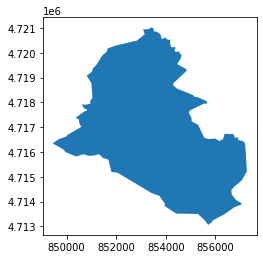

In [ ]:
smallest_municipality.plot()
plt.show()

In [ ]:
smallest_municipality.explore()

In [ ]:
smallest_municipality.COMUNE

13    Capitignano
Name: COMUNE, dtype: object

we can use the same WFS resource used before with the new bounding box

In [ ]:
bbox= list(smallest_municipality.to_crs(epsg=4326).bounds.values[0])

In [ ]:
response = wfs.getfeature(typename=layer, bbox=bbox,srsname='urn:ogc:def:crs:EPSG::4326')

In [ ]:
rivers_capitignano = gpd.read_file(response)

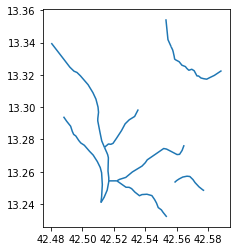

In [ ]:
rivers_capitignano.plot()
plt.show()

... and we need always to invert the axes

In [ ]:
rivers_capitignano['geometry'] = rivers_capitignano['geometry'].apply(lambda geometry: swapxy(geometry))

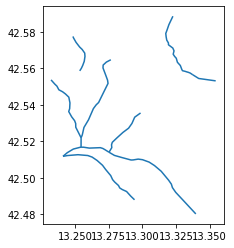

In [ ]:
rivers_capitignano.plot()
plt.show()